<a href="https://colab.research.google.com/github/Rutvik05/RJ/blob/master/Website_performance_analysis_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
df = pd.read_csv('/content/website.csv')

In [43]:
df.head(5)

,# ----------------------------------------,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,Session primary channel group (Default channel...,Date + hour (YYYYMMDDHH),Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count
1,Direct,2024041623,237,300,144,47.526666666666700,0.6075949367088610,4.673333333333330,0.48,1402
2,Organic Social,2024041719,208,267,132,32.09737827715360,0.6346153846153850,4.295880149812730,0.4943820224719100,1147
3,Direct,2024041723,188,233,115,39.93991416309010,0.6117021276595740,4.587982832618030,0.49356223175965700,1069
4,Organic Social,2024041718,187,256,125,32.16015625,0.6684491978609630,4.078125,0.48828125,1044


* Removing the columns unnamed row and placed first row as a columns name.

In [44]:
df.columns = df.iloc[0]
df = df.drop(index=0).reset_index(drop=True)
df.columns=["Channel Group",	"Datehour","Users","Sessions","Engaged sessions","Average engagement time per session","Engaged sessions per user","Events per session","Engagement rate","Event count"	]

In [45]:
df.columns

Index(['Channel Group', 'Datehour', 'Users', 'Sessions', 'Engaged sessions',
       'Average engagement time per session', 'Engaged sessions per user',
       'Events per session', 'Engagement rate', 'Event count'],
      dtype='object')

In [46]:
df.head()

,Channel Group,Datehour,Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count
0,Direct,2024041623,237,300,144,47.526666666666700,0.6075949367088610,4.673333333333330,0.48,1402
1,Organic Social,2024041719,208,267,132,32.09737827715360,0.6346153846153850,4.295880149812730,0.4943820224719100,1147
2,Direct,2024041723,188,233,115,39.93991416309010,0.6117021276595740,4.587982832618030,0.49356223175965700,1069
3,Organic Social,2024041718,187,256,125,32.16015625,0.6684491978609630,4.078125,0.48828125,1044
4,Organic Social,2024041720,175,221,112,46.918552036199100,0.64,4.529411764705880,0.5067873303167420,1001


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   Channel Group                        3182 non-null   object
 1   Datehour                             3182 non-null   object
 2   Users                                3182 non-null   object
 3   Sessions                             3182 non-null   object
 4   Engaged sessions                     3182 non-null   object
 5   Average engagement time per session  3182 non-null   object
 6   Engaged sessions per user            3182 non-null   object
 7   Events per session                   3182 non-null   object
 8   Engagement rate                      3182 non-null   object
 9   Event count                          3182 non-null   object
dtypes: object(10)
memory usage: 248.7+ KB


* Coverting the Datehour columns datatype from object to datetime.

In [48]:
df["Datehour"] = pd.to_datetime(df["Datehour"], format="%Y%m%d%H", errors = 'coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Channel Group                        3182 non-null   object        
 1   Datehour                             3182 non-null   datetime64[ns]
 2   Users                                3182 non-null   object        
 3   Sessions                             3182 non-null   object        
 4   Engaged sessions                     3182 non-null   object        
 5   Average engagement time per session  3182 non-null   object        
 6   Engaged sessions per user            3182 non-null   object        
 7   Events per session                   3182 non-null   object        
 8   Engagement rate                      3182 non-null   object        
 9   Event count                          3182 non-null   object        
dtypes: datetime6

* Converting all columns datatype from object to numerical.

In [49]:
numeric_cols = df.columns.drop(["Channel Group","Datehour"])
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric,errors='coerce')
df["hours"] = df["Datehour"].dt.hour
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 11 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Channel Group                        3182 non-null   object        
 1   Datehour                             3182 non-null   datetime64[ns]
 2   Users                                3182 non-null   int64         
 3   Sessions                             3182 non-null   int64         
 4   Engaged sessions                     3182 non-null   int64         
 5   Average engagement time per session  3182 non-null   float64       
 6   Engaged sessions per user            3182 non-null   float64       
 7   Events per session                   3182 non-null   float64       
 8   Engagement rate                      3182 non-null   float64       
 9   Event count                          3182 non-null   int64         
 10  hours       

In [50]:
df.head()

,Channel Group,Datehour,Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count,hours
0,Direct,2024-04-16 23:00:00,237,300,144,47.526667,0.607595,4.673333,0.480000,1402,23
1,Organic Social,2024-04-17 19:00:00,208,267,132,32.097378,0.634615,4.295880,0.494382,1147,19
2,Direct,2024-04-17 23:00:00,188,233,115,39.939914,0.611702,4.587983,0.493562,1069,23
3,Organic Social,2024-04-17 18:00:00,187,256,125,32.160156,0.668449,4.078125,0.488281,1044,18
4,Organic Social,2024-04-17 20:00:00,175,221,112,46.918552,0.640000,4.529412,0.506787,1001,20


In [51]:
df.describe()

,Datehour,Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count,hours
count,3182,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000
mean,2024-04-20 01:17:07.278441216,41.935889,51.192646,28.325581,66.644581,0.606450,4.675969,0.503396,242.272470,11.807040
min,2024-04-06 00:00:00,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,2024-04-13 02:15:00,20.000000,24.000000,13.000000,32.103034,0.561404,3.750000,0.442902,103.000000,6.000000
50%,2024-04-20 02:00:00,42.000000,51.000000,27.000000,49.020202,0.666667,4.410256,0.545455,226.000000,12.000000
75%,2024-04-26 22:00:00,60.000000,71.000000,41.000000,71.487069,0.750000,5.217690,0.633333,339.000000,18.000000
max,2024-05-03 23:00:00,237.000000,300.000000,144.000000,4525.000000,2.000000,56.000000,1.000000,1402.000000,23.000000
std,NaN,29.582258,36.919962,20.650569,127.200659,0.264023,2.795228,0.228206,184.440313,6.886686


# **Session and Users Overtime**

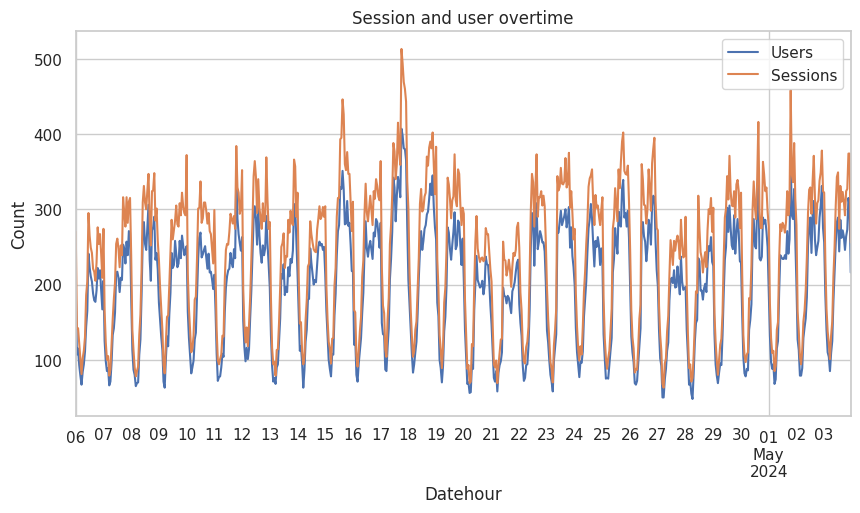

In [52]:
sns.set(style="whitegrid")
plt.figure(figsize=(10,5))
df.groupby("Datehour")[["Users","Sessions"]].sum().plot(ax=plt.gca())
plt.title("Session and user overtime")
plt.ylabel("Count")
plt.xlabel("Datehour")
plt.show()

* By visualze the above graph we can say that users are in overtime in sessions from 15 th 20 hours.


# **Total Users In Channel**

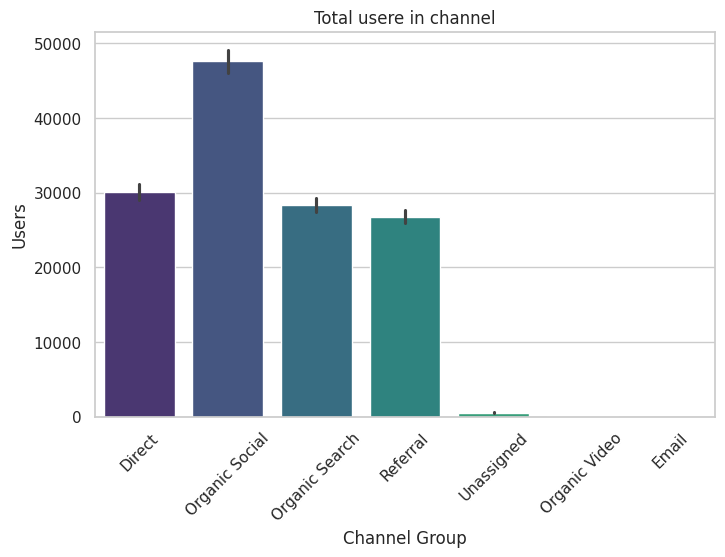

In [53]:
plt.figure(figsize=(8,5))
sns.barplot(data = df, x="Channel Group",y = "Users", estimator = np.sum, palette = "viridis",hue = "Channel Group")
plt.title("Total usere in channel")
plt.xticks(rotation=45)
plt.show()

 * The organic social channel brought higest number of users on website and then follows by direct, organic search and referral channel brought, and then other channels like unassigned, organic video and email less users on this website.

# **Average engagement time by channel**

In [54]:
df.head()

,Channel Group,Datehour,Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count,hours
0,Direct,2024-04-16 23:00:00,237,300,144,47.526667,0.607595,4.673333,0.480000,1402,23
1,Organic Social,2024-04-17 19:00:00,208,267,132,32.097378,0.634615,4.295880,0.494382,1147,19
2,Direct,2024-04-17 23:00:00,188,233,115,39.939914,0.611702,4.587983,0.493562,1069,23
3,Organic Social,2024-04-17 18:00:00,187,256,125,32.160156,0.668449,4.078125,0.488281,1044,18
4,Organic Social,2024-04-17 20:00:00,175,221,112,46.918552,0.640000,4.529412,0.506787,1001,20


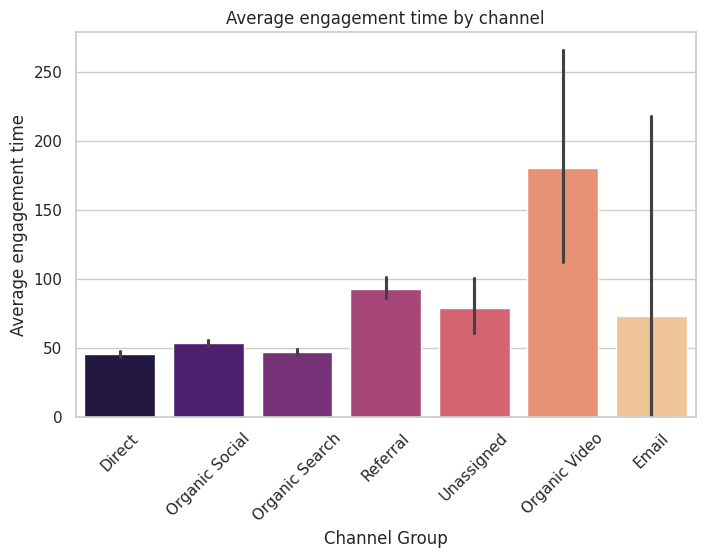

In [55]:
plt.figure(figsize=(8,5))
sns.barplot(data = df, x = "Channel Group", y = "Average engagement time per session", estimator = np.mean, palette = "magma",hue = "Channel Group")
plt.title("Average engagement time by channel")
plt.xticks(rotation=45)
plt.ylabel("Average engagement time")
plt.show()

* The organic video channel group is where users average engagement time is high compare other cahnnels.

# **Engagement Rate Distribution by channel**

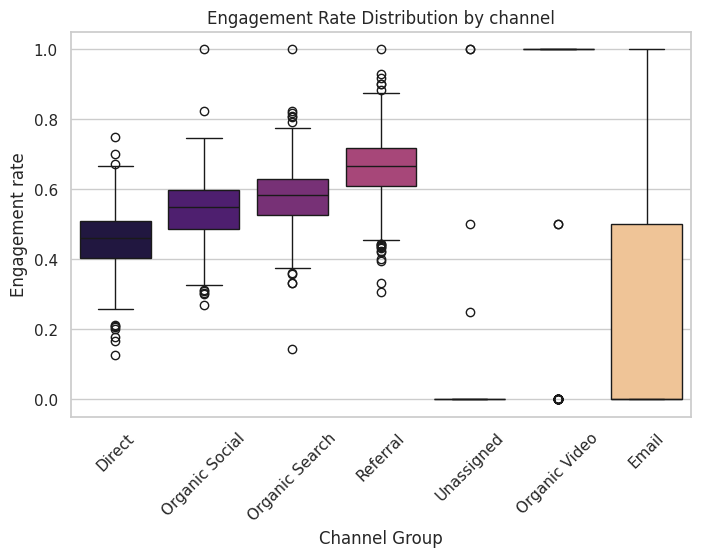

In [56]:
plt.figure(figsize=(8,5))
sns.boxplot(data = df, x = "Channel Group", y = "Engagement rate", palette = "magma",hue = "Channel Group")
plt.title("Engagement Rate Distribution by channel")
plt.xticks(rotation=45)
plt.show()

* The referral channel has more engagement rate and along with organic search channel has more engagement rate but compare referral channel less, but in email channel where engagement rate is low.

# **Engaged V/S Non-Engaged Session**

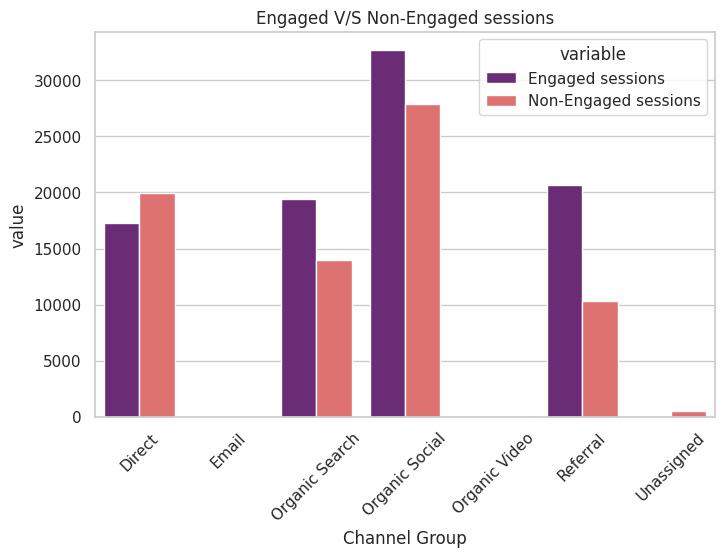

In [57]:
session_df = df.groupby("Channel Group")[["Sessions","Engaged sessions"]].sum().reset_index()
session_df["Non-Engaged sessions"] = session_df["Sessions"] - session_df["Engaged sessions"]
session_df_melted = session_df.melt(id_vars = "Channel Group", value_vars = ["Engaged sessions","Non-Engaged sessions"])

plt.figure(figsize=(8,5))
sns.barplot(data = session_df_melted, x = "Channel Group", y = "value", palette = "magma",hue = "variable")
plt.title("Engaged V/S Non-Engaged sessions")
plt.xticks(rotation=45)
plt.show()

* The blue color bar shows the engaged and orange color bar shows non-engaged. And organic social channel has more engaged session, and unassigned channel almost no engaged session.

* Along with that we see that in direct channel the non-engaged session more compare to engaged so we have to work on more on this channel.

# **Traffic By Hour and Channel**

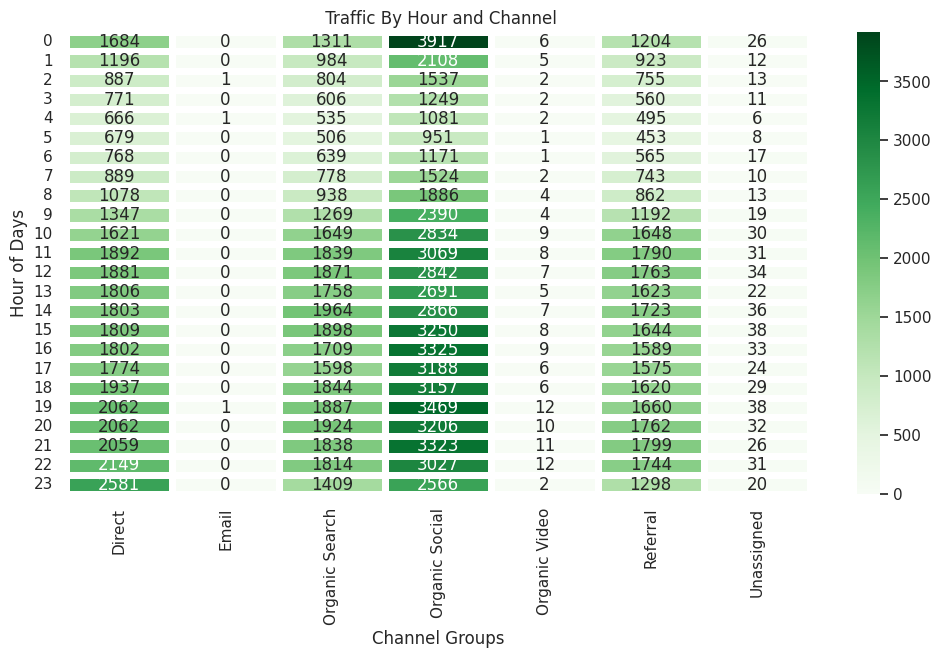

In [58]:
heatmap_data = df.groupby(["hours","Channel Group"])["Sessions"].sum().unstack().fillna(0)

plt.figure(figsize=(12,6))
sns.heatmap(heatmap_data, linewidths=5, annot = True, fmt = '.0f', cmap="Greens")
plt.title(" Traffic By Hour and Channel")
plt.xlabel("Channel Groups")
plt.ylabel("Hour of Days")
plt.show()

* By visualizing the heatmap the dark color in the graph shows high traffic and light color shows low traffic.

* And by visualizing in organic social channel we see that mid-night means night 12 clock is high traffic.

# **Engagement Rate V/S Sessions Overtime**

In [59]:
df.head()

,Channel Group,Datehour,Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count,hours
0,Direct,2024-04-16 23:00:00,237,300,144,47.526667,0.607595,4.673333,0.480000,1402,23
1,Organic Social,2024-04-17 19:00:00,208,267,132,32.097378,0.634615,4.295880,0.494382,1147,19
2,Direct,2024-04-17 23:00:00,188,233,115,39.939914,0.611702,4.587983,0.493562,1069,23
3,Organic Social,2024-04-17 18:00:00,187,256,125,32.160156,0.668449,4.078125,0.488281,1044,18
4,Organic Social,2024-04-17 20:00:00,175,221,112,46.918552,0.640000,4.529412,0.506787,1001,20


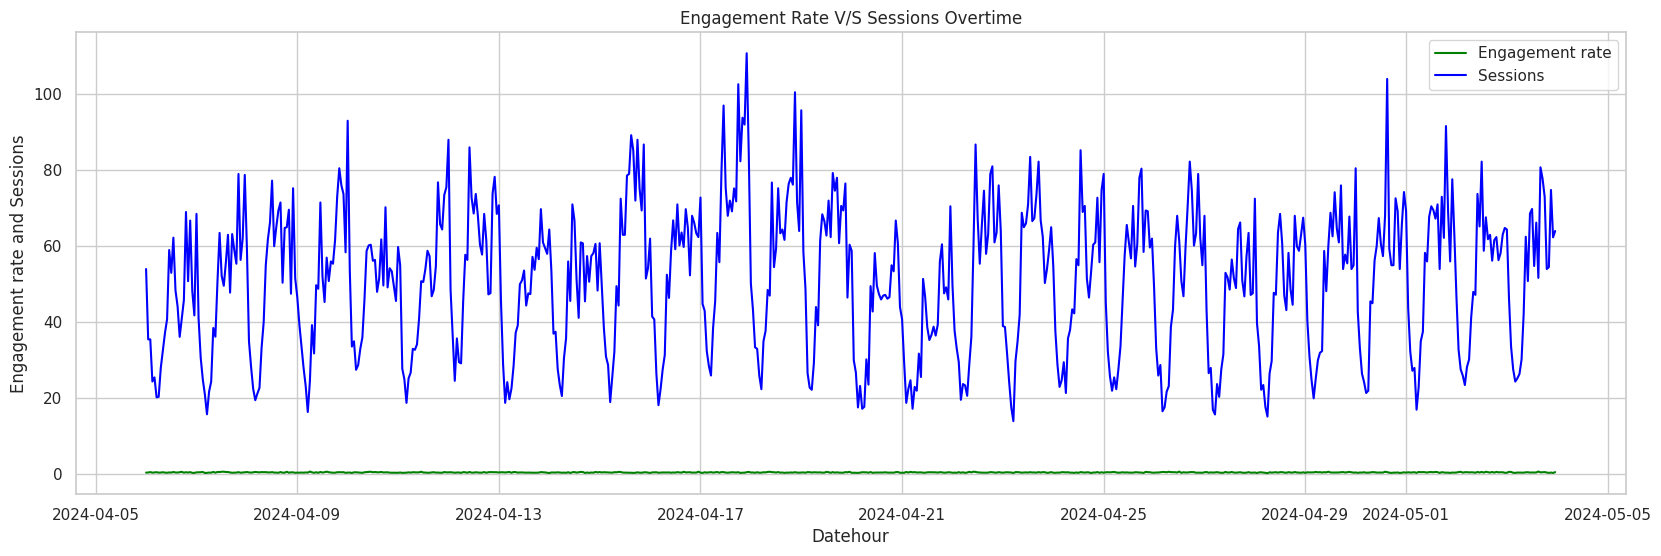

In [60]:
df_plot = df.groupby("Datehour")[["Engagement rate","Sessions"]].mean().reset_index()

plt.figure(figsize=(20,6))
plt.plot(df_plot["Datehour"],df_plot["Engagement rate"],label = "Engagement rate",color = "Green")
plt.plot(df_plot["Datehour"],df_plot["Sessions"],label = "Sessions",color = "Blue")
plt.title("Engagement Rate V/S Sessions Overtime")
plt.xlabel("Datehour")
plt.ylabel("Engagement rate and Sessions")
plt.legend()
plt.show()

* By seeing the graph where the sessions high and engagement rate is less.

* Conclusion in session is high and the engagement rate in less.